In [2]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pylab as plt
from scipy.io import loadmat
import tensor
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
U=tensor.randomortho(50,10); V=tensor.randomortho(50,10); W=tensor.randomortho(50,10)

In [4]:
X0=np.dot(U.reshape((50,1,1,10)) * V.reshape((50,1,10)) * W, range(1,11))
Y=X0+1.0/np.sqrt(50)*np.random.randn(50,50,50)

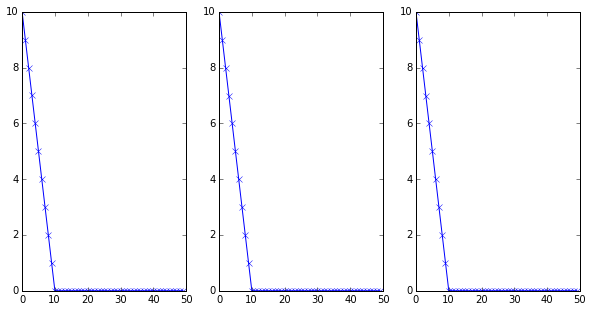

In [5]:
# Plot the singular values
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(1,3,1); plt.plot(np.linalg.svd(tensor.unfold(X0,0),compute_uv=False),'-x')
plt.subplot(1,3,2); plt.plot(np.linalg.svd(tensor.unfold(X0,1),compute_uv=False),'-x')
plt.subplot(1,3,3); plt.plot(np.linalg.svd(tensor.unfold(X0,2),compute_uv=False),'-x')

In [6]:
# Power method
X=Y
Uhat=[]; Vhat=[]; What=[]
vals=[]
for rr in range(10):
    uu=np.random.randn(50); uu/=norm(uu)
    vv=np.random.randn(50); vv/=norm(vv)
    ww=np.random.randn(50); ww/=norm(ww)
    
    for kk in range(50):
        unew = ((X * ww).sum(2) * vv).sum(1)
        vnew = ((X.transpose((1,2,0)) * uu).sum(2) * ww).sum(1)
        wnew = ((X.transpose((2,0,1)) * vv).sum(2) * uu).sum(1)
        val=np.sqrt((norm(unew)**2 + norm(vnew)**2 + norm(wnew)**2)/3)
        unew/=norm(unew); vnew/=norm(vnew); wnew/=norm(wnew)
        res  = 1-(np.dot(unew.T,uu)+np.dot(vnew.T,vv)+np.dot(wnew.T,ww))/3
        print 'kk=%d, val=%g res=%g' % (kk, val, res)
        uu=unew; vv=vnew; ww=wnew
        if res<1e-6:
            break
    Uhat.append(uu); Vhat.append(vv); What.append(ww)
    vals.append(val)
    X=X-val* tensor.outer((uu,vv,ww))
    print ' norm(X)=%g' % (norm(X.ravel()))


kk=0, val=1.16322 res=0.887447
kk=1, val=1.22619 res=1.04932
kk=2, val=1.71681 res=1.17919
kk=3, val=3.75405 res=0.454792
kk=4, val=8.99419 res=0.0572391
kk=5, val=10.0103 res=0.00174239
kk=6, val=10.0416 res=6.93716e-05
kk=7, val=10.0428 res=3.38119e-06
kk=8, val=10.0429 res=1.87129e-07
 norm(X)=52.8055
kk=0, val=1.10271 res=1.00273
kk=1, val=1.22114 res=1.03137
kk=2, val=2.06901 res=0.643822
kk=3, val=6.68147 res=0.158101
kk=4, val=9.12225 res=0.0079347
kk=5, val=9.25074 res=0.000406379
kk=6, val=9.25709 res=2.58727e-05
kk=7, val=9.25748 res=1.81776e-06
kk=8, val=9.25751 res=1.34298e-07
 norm(X)=51.9877
kk=0, val=0.998866 res=1.07512
kk=1, val=0.977407 res=1.20147
kk=2, val=1.12769 res=1.01691
kk=3, val=1.32053 res=0.823838
kk=4, val=3.21745 res=0.42947
kk=5, val=7.27013 res=0.0661887
kk=6, val=8.23839 res=0.00348767
kk=7, val=8.28971 res=0.000223236
kk=8, val=8.29292 res=1.59956e-05
kk=9, val=8.29315 res=1.21702e-06
kk=10, val=8.29317 res=9.63658e-08
 norm(X)=51.322
kk=0, val=0.9701

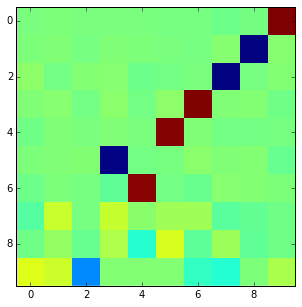

In [7]:
plt.imshow(np.dot(np.array(Uhat), U),interpolation='none')